# Aprendizado de máquina
## Agrupamento de dados

Encontrar grupos de dados similares em um grupo

* É não supervisionada
    * Não tenho rótulos ou variáveis que dependem das demais

**Problema do K-means:**

* Como as posições iniciais dos centróides são aleatórias o resultado final nem sempre é o mesmo
* É sucetível aos outliers -> a média muda (o mean), o que muda o centróide



## Coeficiente de silhueta

𝑠 = 𝑏 − 𝑎 / max(𝑎, 𝑏)

Para cada ponto:
a = distância média considerando o resto do grupo
b = média considerando os pontos do grupo mais próximo

**QUANTO MAIOR O COEFICIENTE, MELHOR**

* Algoritmo de Classificação: classes já definidas
* Algoritmo de Agrupamento: o algoritmo diz quantos grupos são, mas o problema em si não define explicitamente isso.

> POSSO USAR A CLASSIFICAÇÃO PARA FAZER PREDIÇÃO, MAS ELE NÃO PREDIZ REALMENTE

## DBSCAN

* `min_samples` - valores altos requerem dados bastante densos para a formação de grupos.
* `eps` - valores baixo requerem dados bastante densos para a formação de grupos.
* Outliers são rotulados como `-1`


## K-means

In [1]:
from sklearn import cluster, datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

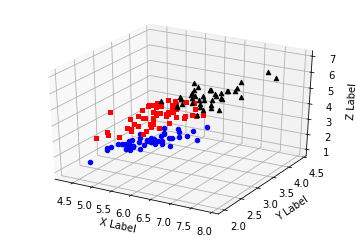

In [9]:
iris = datasets.load_iris()
X_iris = iris.data
X_iris3D = X_iris[:,0:3] # todas as linhas e as colunas 0, 1 e 2.
k_means = cluster.KMeans(n_clusters=3) # Quantos grupos
k_means.fit(X_iris3D)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # 111 corresponde às coordendas i,j,k de possíveis subfiguras.
color = ['r','b','k'] # marcadores de cor
mark = ['s','o','^'] # marcadores simbólicos
for i in range(len(X_iris3D)):
    ax.scatter(X_iris3D[i][0],X_iris3D[i][1],X_iris3D[i][2],c=color[k_means.labels_[i]],marker=mark[k_means.labels_[i]])

ax.set_xlabel('X Label') # rótulos dos eixos
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## DBSCAN

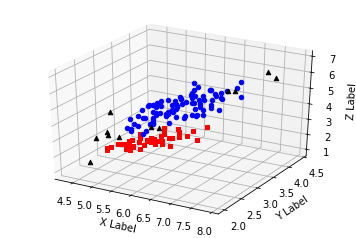

In [12]:
iris = datasets.load_iris()
X_iris = iris.data
X_iris3D = X_iris[:,0:3] # todas as linhas e as colunas 0, 1 e 2.

dbscan = cluster.DBSCAN()
dbscan.fit(X_iris3D)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # 111 corresponde às coordendas i,j,k de possíveis subfiguras.
color = ['r','b','k'] # marcadores de cor
mark = ['s','o','^'] # marcadores simbólicos
for i in range(len(X_iris3D)):
    ax.scatter(X_iris3D[i][0],X_iris3D[i][1],X_iris3D[i][2],c=color[dbscan.labels_[i]],marker=mark[dbscan.labels_[i]])

ax.set_xlabel('X Label') # rótulos dos eixos
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## Coeficiente de silhueta: K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [15]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

NameError: name 'X' is not defined

## Realizando predição usando agrupamentos 

In [23]:
from sklearn import datasets
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:

wine = datasets.load_wine()
wine_X = wine.data[:,1:3] # Usa os atributos 1 e 2
wine_X_train = wine_X[:-30] # Separa conjunto em dois
wine_X_test = wine_X[-30:]
af = AffinityPropagation(preference=-50)
labels_cluster = af.fit_predict(wine_X_train) # Encontra agrupamentos e define centroide
n_clusters_ = len(af.cluster_centers_indices_) # Obtem o número de grupos encontrados
labels_pred = af.predict(wine_X_test) # Utiliza centroides para agrupar novos dados
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(wine_X_train)): # desenha dados de ‘treino’
    color = cm.spectral(labels_cluster[i] / n_clusters_)
    ax.scatter(wine_X_train[i][0],wine_X_train[i][1],c=color,marker='o')

for j in range(len(wine_X_test)): # desenha dados de ‘teste’
    color = cm.spectral(labels_pred[j] / n_clusters_)
    ax.scatter(wine_X_test[j][0],wine_X_test[j][1],c=color,marker='+')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.show()

AttributeError: module 'sklearn.datasets' has no attribute 'load_wine'